# Importing necessary library

In [57]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# importing the dataset

In [58]:
df=pd.read_csv("customer_data.csv")

In [59]:
df=df.rename(columns={"LOAN_AMT":"LATE_PAY_FEE"})

In [60]:
df.shape

(2000000, 33)

In [61]:
df.head()

,SERVICE_NUMBER,CUST_TYPE_NAME,NET_BUSI_TYPE_NAME,STATUS_NAME,CUST_AGE,GENDER_NAME,EDUCATION_NAME,OPER_TYPE,LOAN_BALANCE_TYPE,INIT_LOAN_AMT,...,PEAK_AMT_ETB,INTER_USG_MINUTE,INTER_AMT_ETB,SMS_LOCAL_USAGE,SMS_LOCAL_FEE_ETB,SMS_INTER_USAGE,SMS_INTER_FEE_ETB,SMS_LOCAL_FEE_ETB.1,DATA_USAGE_MB,DATA_REVENUE_ETB
19392800,9024991,Individual,WCDMA,Active,48.0,Male,Illiterate,R,2000,150000,...,0,0,0,0,0,0,0,0,0,0
14054985,9012089,Individual,LTE,Active,25.0,Female,Secondary school,L,2000,150000,...,79920,0,0,0,0,0,0,0,0,0
13966960,9047303,Individual,LTE,Active,37.0,Male,Secondary school,T,2000,150000,...,20652,0,0,2,2398,0,0,2398,0,0
8165898,9063121,Individual,LTE,Active,22.0,Male,Secondary school,T,2000,150000,...,0,0,0,0,0,0,0,0,102400,196
9890129,9046680,Individual,LTE,Active,31.0,Male,Primary School,T,2000,100000,...,16261,0,0,0,0,0,0,0,0,0


# EDA

In [62]:
df.dtypes

SERVICE_NUMBER                                               int64
CUST_TYPE_NAME                                              object
NET_BUSI_TYPE_NAME                                          object
STATUS_NAME                                                 object
CUST_AGE                                                   float64
GENDER_NAME                                                 object
EDUCATION_NAME                                              object
OPER_TYPE                                                   object
LOAN_BALANCE_TYPE                                            int64
INIT_LOAN_AMT                                                int64
INIT_LOAN_POUNDAGE                                           int64
LATE_PAY_FEE                                                 int64
LOAN_POUNDAGE                                                int64
REPAY_AMT                                                    int64
REPAY_POUNDAGE                                             flo

In [63]:
#plt.figure(fig.size(10,8))
corr = df.corr()

#corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

In [64]:
corr

,SERVICE_NUMBER,CUST_AGE,LOAN_BALANCE_TYPE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,REPAY_AMT,REPAY_POUNDAGE,LOAN_PENALTY,...,PEAK_AMT_ETB,INTER_USG_MINUTE,INTER_AMT_ETB,SMS_LOCAL_USAGE,SMS_LOCAL_FEE_ETB,SMS_INTER_USAGE,SMS_INTER_FEE_ETB,SMS_LOCAL_FEE_ETB.1,DATA_USAGE_MB,DATA_REVENUE_ETB
SERVICE_NUMBER,1.000000,0.038884,NaN,-0.019502,-0.019502,-0.006141,-0.009369,-0.018986,-0.013381,NaN,...,-0.005222,0.001472,0.002421,-0.007326,-0.007181,-0.000257,NaN,-0.007181,0.019254,-0.006171
CUST_AGE,0.038884,1.000000,NaN,0.008994,0.008994,0.003692,0.003942,0.007430,0.006725,NaN,...,0.002716,0.001182,0.000593,-0.001122,0.001478,0.000796,NaN,0.001478,-0.003472,0.000618
LOAN_BALANCE_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INIT_LOAN_AMT,-0.019502,0.008994,NaN,1.000000,1.000000,0.530499,0.701126,0.501903,0.389976,NaN,...,0.007038,0.000734,0.001114,0.000583,0.000315,0.001824,NaN,0.000315,0.007023,0.003727
INIT_LOAN_POUNDAGE,-0.019502,0.008994,NaN,1.000000,1.000000,0.530499,0.701126,0.501903,0.389976,NaN,...,0.007038,0.000734,0.001114,0.000583,0.000315,0.001824,NaN,0.000315,0.007023,0.003727
LATE_PAY_FEE,-0.006141,0.003692,NaN,0.530499,0.530499,1.000000,0.752014,-0.119615,-0.278040,NaN,...,0.002456,-0.001386,-0.000520,-0.000277,-0.000956,-0.000280,NaN,-0.000956,0.004797,0.000307
LOAN_POUNDAGE,-0.009369,0.003942,NaN,0.701126,0.701126,0.752014,1.000000,0.289781,-0.375204,NaN,...,0.004603,-0.000902,-0.000427,-0.000141,-0.001706,0.002287,NaN,-0.001706,0.004252,0.000464
REPAY_AMT,-0.018986,0.007430,NaN,0.501903,0.501903,-0.119615,0.289781,1.000000,0.290817,NaN,...,0.006278,0.002806,0.002456,0.000586,0.000619,0.001652,NaN,0.000619,0.001631,0.003488
REPAY_POUNDAGE,-0.013381,0.006725,NaN,0.389976,0.389976,-0.278040,-0.375204,0.290817,1.000000,NaN,...,0.002762,0.001876,0.001750,0.001004,0.002787,-0.000554,NaN,0.002787,0.003287,0.004307
LOAN_PENALTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

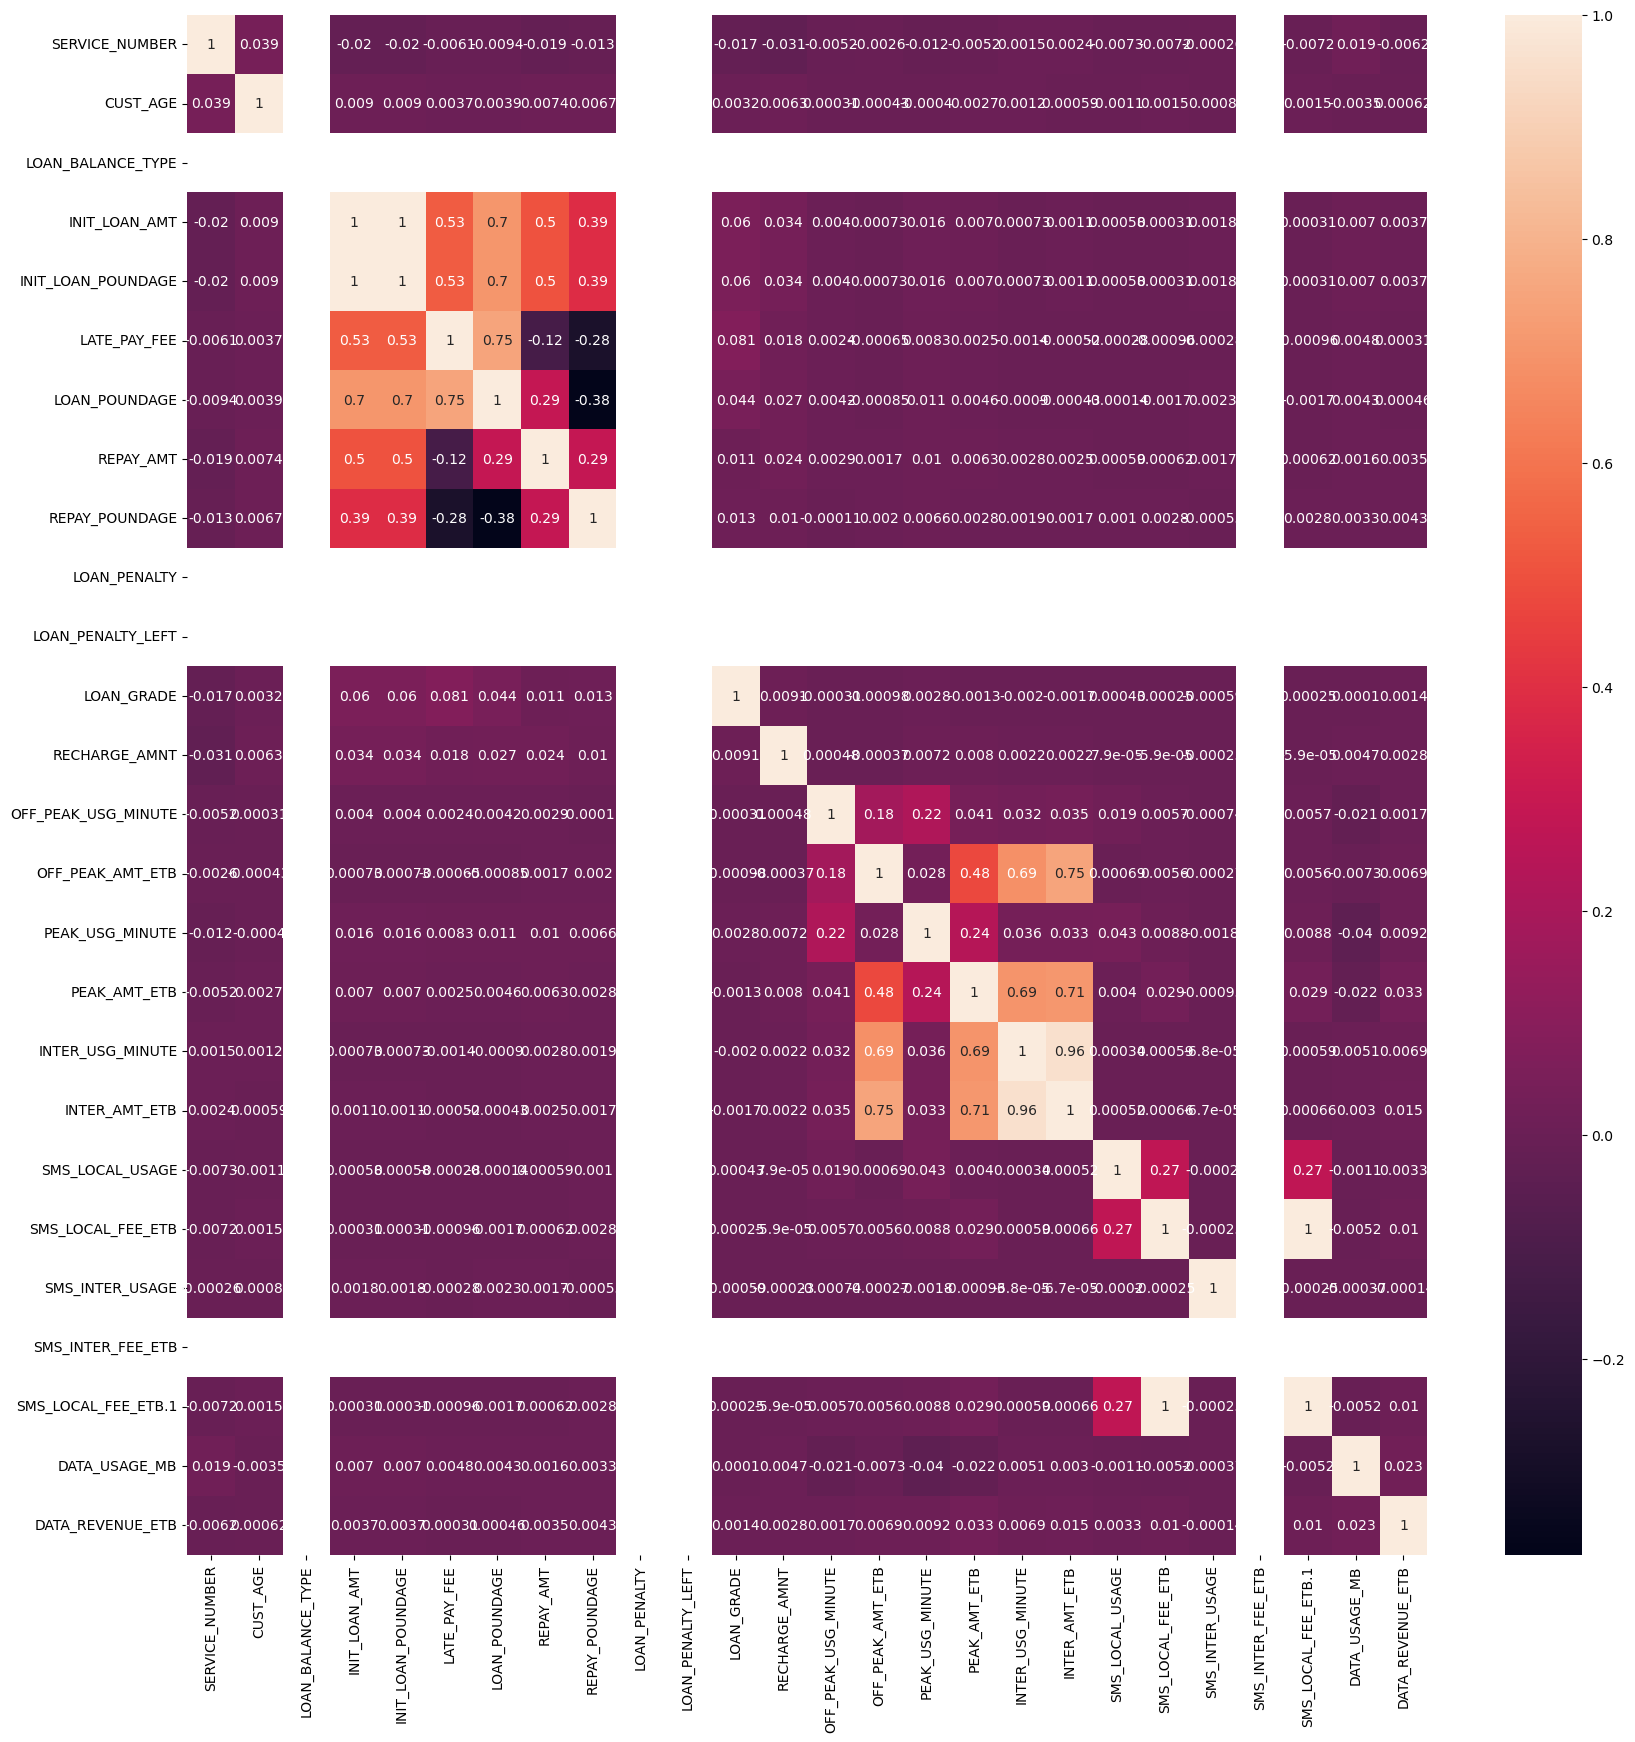

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corr,annot=True)

In [66]:
df.describe()

,SERVICE_NUMBER,CUST_AGE,LOAN_BALANCE_TYPE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,REPAY_AMT,REPAY_POUNDAGE,LOAN_PENALTY,...,PEAK_AMT_ETB,INTER_USG_MINUTE,INTER_AMT_ETB,SMS_LOCAL_USAGE,SMS_LOCAL_FEE_ETB,SMS_INTER_USAGE,SMS_INTER_FEE_ETB,SMS_LOCAL_FEE_ETB.1,DATA_USAGE_MB,DATA_REVENUE_ETB
count,2.000000e+06,1.956257e+06,2000000.0,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000.0,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000.0,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.033676e+06,3.554241e+01,2000.0,1.913779e+05,1.913779e+04,5.901531e+04,1.144653e+04,7.907382e+04,7.568991e+03,0.0,...,1.567123e+04,8.172855e-01,1.100180e+03,6.317465e-01,1.964154e+02,1.120000e-04,0.0,1.964154e+02,9.412949e+07,6.653445e+03
std,2.073934e+04,1.175340e+01,0.0,1.732897e+05,1.732897e+04,1.225074e+05,1.715116e+04,1.107037e+05,1.311395e+04,0.0,...,4.769416e+04,3.408630e+01,4.667308e+04,8.906257e+00,2.199409e+03,3.959783e-02,0.0,2.199409e+03,7.122762e+08,1.341033e+05
min,9.000000e+06,8.000000e+00,2000.0,5.000000e+04,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.091090e+05,0.000000e+00,0.0,-1.091090e+05,0.000000e+00,0.000000e+00
25%,9.015786e+06,2.800000e+01,2000.0,1.000000e+05,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.030410e+06,3.300000e+01,2000.0,1.500000e+05,1.500000e+04,0.000000e+00,5.000000e+03,5.000000e+04,0.000000e+00,0.0,...,9.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.050393e+06,4.000000e+01,2000.0,2.500000e+05,2.500000e+04,7.000000e+04,1.500000e+04,1.000000e+05,1.200000e+04,0.0,...,1.603500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.024000e+05,0.000000e+00
max,9.076527e+06,1.237000e+03,2000.0,5.930700e+06,5.930700e+05,4.550700e+06,5.930700e+05,1.050000e+06,1.050000e+05,0.0,...,9.752961e+06,1.082600e+04,1.616683e+07,4.123000e+03,2.985510e+05,1.400000e+01,0.0,2.985510e+05,5.762345e+10,5.800354e+07


# Data Preprocessing

# Taking the instance called "Individual" from the "CUST_TYPE_NAME" attribute 

In [67]:
(df["CUST_TYPE_NAME"].unique(), df["STATUS_NAME"].unique())# from 'CUST_TYPE_NAME' take 'individual' and from 'STATUS_NAME' take 'active'

(array(['Individual', 'Enterprise'], dtype=object),
 array(['Active', 'Idle', 'Barring', 'Predeactivated', 'Suspend'],
       dtype=object))

In [68]:
df= df.loc[(df["CUST_TYPE_NAME"]=='Individual') & (df["STATUS_NAME"]=='Active')& \
     (df["DECODE(T.SGMT_TYPE,0,'PREPAID',1,'POSTPAID',2,'HYBRID')"]=='prepaid')]

In [69]:
df.shape

(1168000, 33)

In [70]:
df.columns

Index(['SERVICE_NUMBER', 'CUST_TYPE_NAME', 'NET_BUSI_TYPE_NAME', 'STATUS_NAME',
       'CUST_AGE', 'GENDER_NAME', 'EDUCATION_NAME', 'OPER_TYPE',
       'LOAN_BALANCE_TYPE', 'INIT_LOAN_AMT', 'INIT_LOAN_POUNDAGE',
       'LATE_PAY_FEE', 'LOAN_POUNDAGE', 'REPAY_AMT', 'REPAY_POUNDAGE',
       'LOAN_PENALTY', 'LOAN_PENALTY_LEFT', 'LOAN_GRADE',
       'DECODE(T.SGMT_TYPE,0,'PREPAID',1,'POSTPAID',2,'HYBRID')',
       'RECHARGE_AMNT', 'OFF_PEAK_USG_MINUTE', 'OFF_PEAK_AMT_ETB',
       'PEAK_USG_MINUTE', 'PEAK_AMT_ETB', 'INTER_USG_MINUTE', 'INTER_AMT_ETB',
       'SMS_LOCAL_USAGE', 'SMS_LOCAL_FEE_ETB', 'SMS_INTER_USAGE',
       'SMS_INTER_FEE_ETB', 'SMS_LOCAL_FEE_ETB.1', 'DATA_USAGE_MB',
       'DATA_REVENUE_ETB'],
      dtype='object')

In [71]:
df["DECODE(T.SGMT_TYPE,0,'PREPAID',1,'POSTPAID',2,'HYBRID')"]

19392800    prepaid
14054985    prepaid
13966960    prepaid
8165898     prepaid
9890129     prepaid
             ...   
5385997     prepaid
1454402     prepaid
14071393    prepaid
7404787     prepaid
14974423    prepaid
Name: DECODE(T.SGMT_TYPE,0,'PREPAID',1,'POSTPAID',2,'HYBRID'), Length: 1168000, dtype: object

In [72]:
df["LOAN_BALANCE_TYPE"].unique()

array([2000])

In [73]:
df["LOAN_PENALTY"].unique()

array([0])

In [74]:
df["LOAN_PENALTY_LEFT"].unique()

array([0])

In [75]:
df["LOAN_GRADE"].unique()

array([-1, 10,  2,  3,  8,  7,  1,  4,  6,  9, 12,  5, 11])

In [76]:
df["LOAN_GRADE"].unique()

array([-1, 10,  2,  3,  8,  7,  1,  4,  6,  9, 12,  5, 11])

In [77]:
df['SMS_INTER_FEE_ETB'].unique()

array([0])

In [78]:
df['SMS_INTER_USAGE'].unique()

array([ 0, 14])

# drop

In [19]:
# "SERVICE_NUMBER","CUST_TYPE_NAME", "LOAN_BALANCE_TYPE"(200), "LOAN_PENALTY"(0), "LOAN_PENALTY_LEFT"[0],"L,OAN_GRADE",'DECODE(T.SGMT_TYPE,0,'PREPAID',1,'POSTPAID',2,'HYBRID',"SMS_LOCAL_FEE_ETB.1"

In [79]:
df=df.drop(["SERVICE_NUMBER","CUST_TYPE_NAME","LOAN_BALANCE_TYPE","LOAN_PENALTY",\
            "LOAN_PENALTY_LEFT", "LOAN_GRADE","DECODE(T.SGMT_TYPE,0,'PREPAID',1,'POSTPAID',2,'HYBRID')",
            "SMS_LOCAL_FEE_ETB.1","SMS_INTER_FEE_ETB","SMS_INTER_USAGE"],axis=1)

In [80]:
df["EDUCATION_NAME"].value_counts()

Secondary school             341174
Illiterate                   333694
Primary School               186564
Diploma/Certificate          119549
Bachelor's Degree             57800
Master's Degree and Above      2943
Name: EDUCATION_NAME, dtype: int64

In [81]:
df.shape

(1168000, 23)

In [82]:
df.columns

Index(['NET_BUSI_TYPE_NAME', 'STATUS_NAME', 'CUST_AGE', 'GENDER_NAME',
       'EDUCATION_NAME', 'OPER_TYPE', 'INIT_LOAN_AMT', 'INIT_LOAN_POUNDAGE',
       'LATE_PAY_FEE', 'LOAN_POUNDAGE', 'REPAY_AMT', 'REPAY_POUNDAGE',
       'RECHARGE_AMNT', 'OFF_PEAK_USG_MINUTE', 'OFF_PEAK_AMT_ETB',
       'PEAK_USG_MINUTE', 'PEAK_AMT_ETB', 'INTER_USG_MINUTE', 'INTER_AMT_ETB',
       'SMS_LOCAL_USAGE', 'SMS_LOCAL_FEE_ETB', 'DATA_USAGE_MB',
       'DATA_REVENUE_ETB'],
      dtype='object')

In [83]:
df.dtypes

NET_BUSI_TYPE_NAME      object
STATUS_NAME             object
CUST_AGE               float64
GENDER_NAME             object
EDUCATION_NAME          object
OPER_TYPE               object
INIT_LOAN_AMT            int64
INIT_LOAN_POUNDAGE       int64
LATE_PAY_FEE             int64
LOAN_POUNDAGE            int64
REPAY_AMT                int64
REPAY_POUNDAGE         float64
RECHARGE_AMNT          float64
OFF_PEAK_USG_MINUTE      int64
OFF_PEAK_AMT_ETB         int64
PEAK_USG_MINUTE          int64
PEAK_AMT_ETB             int64
INTER_USG_MINUTE         int64
INTER_AMT_ETB            int64
SMS_LOCAL_USAGE          int64
SMS_LOCAL_FEE_ETB        int64
DATA_USAGE_MB            int64
DATA_REVENUE_ETB         int64
dtype: object

# handling missing values

In [84]:
df.isnull().sum()# ['CUST_AGE','GENDER_NAME', 'EDUCATION_NAME', 'DECODE', 'RECHARGE_AMNT' ] has missing values

NET_BUSI_TYPE_NAME          0
STATUS_NAME                 0
CUST_AGE                 3877
GENDER_NAME              3727
EDUCATION_NAME         126276
OPER_TYPE                   0
INIT_LOAN_AMT               0
INIT_LOAN_POUNDAGE          0
LATE_PAY_FEE                0
LOAN_POUNDAGE               0
REPAY_AMT                   0
REPAY_POUNDAGE              0
RECHARGE_AMNT               0
OFF_PEAK_USG_MINUTE         0
OFF_PEAK_AMT_ETB            0
PEAK_USG_MINUTE             0
PEAK_AMT_ETB                0
INTER_USG_MINUTE            0
INTER_AMT_ETB               0
SMS_LOCAL_USAGE             0
SMS_LOCAL_FEE_ETB           0
DATA_USAGE_MB               0
DATA_REVENUE_ETB            0
dtype: int64

# fill the missing data of "CUST_AGE" and "RECHARGE_AMNT" by their mean

In [85]:
# Forward-Fill
df= df.fillna(method="ffill")

In [86]:
#Replace the missing values for numerical columns with mean
#df['CUST_AGE'] = df['CUST_AGE'].fillna(df['CUST_AGE'].mean())
#df['RECHARGE_AMNT'] = df['RECHARGE_AMNT'].fillna(df['RECHARGE_AMNT'].mean())

# Fill the categorical missing values by Mode

In [87]:
# filling with most common class
#df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [88]:
df.isna().sum()

NET_BUSI_TYPE_NAME     0
STATUS_NAME            0
CUST_AGE               0
GENDER_NAME            0
EDUCATION_NAME         0
OPER_TYPE              0
INIT_LOAN_AMT          0
INIT_LOAN_POUNDAGE     0
LATE_PAY_FEE           0
LOAN_POUNDAGE          0
REPAY_AMT              0
REPAY_POUNDAGE         0
RECHARGE_AMNT          0
OFF_PEAK_USG_MINUTE    0
OFF_PEAK_AMT_ETB       0
PEAK_USG_MINUTE        0
PEAK_AMT_ETB           0
INTER_USG_MINUTE       0
INTER_AMT_ETB          0
SMS_LOCAL_USAGE        0
SMS_LOCAL_FEE_ETB      0
DATA_USAGE_MB          0
DATA_REVENUE_ETB       0
dtype: int64

In [89]:
df[["INIT_LOAN_AMT","INIT_LOAN_POUNDAGE","LOAN_POUNDAGE","REPAY_AMT","REPAY_POUNDAGE","LATE_PAY_FEE",\
   "OFF_PEAK_AMT_ETB","PEAK_AMT_ETB","INTER_AMT_ETB","SMS_LOCAL_FEE_ETB","DATA_USAGE_MB","DATA_REVENUE_ETB"]]\
=df[["INIT_LOAN_AMT","INIT_LOAN_POUNDAGE","LOAN_POUNDAGE","REPAY_AMT","REPAY_POUNDAGE","LATE_PAY_FEE",\
    "OFF_PEAK_AMT_ETB","PEAK_AMT_ETB","INTER_AMT_ETB","SMS_LOCAL_FEE_ETB","DATA_USAGE_MB","DATA_REVENUE_ETB"]]\
.div(10000).astype("int")

In [90]:
df.head()

,NET_BUSI_TYPE_NAME,STATUS_NAME,CUST_AGE,GENDER_NAME,EDUCATION_NAME,OPER_TYPE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,...,OFF_PEAK_USG_MINUTE,OFF_PEAK_AMT_ETB,PEAK_USG_MINUTE,PEAK_AMT_ETB,INTER_USG_MINUTE,INTER_AMT_ETB,SMS_LOCAL_USAGE,SMS_LOCAL_FEE_ETB,DATA_USAGE_MB,DATA_REVENUE_ETB
19392800,WCDMA,Active,48.0,Male,Illiterate,R,15,1,0,0,...,338,0,1230,0,0,0,0,0,0,0
14054985,LTE,Active,25.0,Female,Secondary school,L,15,1,15,1,...,0,0,952,7,0,0,0,0,0,0
13966960,LTE,Active,37.0,Male,Secondary school,T,15,1,1,1,...,0,0,246,2,0,0,2,0,0,0
8165898,LTE,Active,22.0,Male,Secondary school,T,15,1,0,0,...,0,0,218,0,0,0,0,0,10,0
9890129,LTE,Active,31.0,Male,Primary School,T,10,1,9,1,...,16,0,2062,1,0,0,0,0,0,0


# chang the "CUST_AGE" data type to int to ignore zeros after number


In [91]:
df['CUST_AGE'] = df['CUST_AGE'].astype(int)

In [92]:
df.dtypes

NET_BUSI_TYPE_NAME      object
STATUS_NAME             object
CUST_AGE                 int64
GENDER_NAME             object
EDUCATION_NAME          object
OPER_TYPE               object
INIT_LOAN_AMT            int64
INIT_LOAN_POUNDAGE       int64
LATE_PAY_FEE             int64
LOAN_POUNDAGE            int64
REPAY_AMT                int64
REPAY_POUNDAGE           int64
RECHARGE_AMNT          float64
OFF_PEAK_USG_MINUTE      int64
OFF_PEAK_AMT_ETB         int64
PEAK_USG_MINUTE          int64
PEAK_AMT_ETB             int64
INTER_USG_MINUTE         int64
INTER_AMT_ETB            int64
SMS_LOCAL_USAGE          int64
SMS_LOCAL_FEE_ETB        int64
DATA_USAGE_MB            int64
DATA_REVENUE_ETB         int64
dtype: object

In [93]:
# converting 'CUST_AGE' from float to int
#df['CUST_AGE'] = df['CUST_AGE'].astype(int)
df['RECHARGE_AMNT']=df['RECHARGE_AMNT'].astype(int)

# dummify

In [94]:
df=pd.get_dummies(df,df.columns[df.dtypes == 'object'],drop_first=True)

In [95]:
df.head()

,CUST_AGE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,REPAY_AMT,REPAY_POUNDAGE,RECHARGE_AMNT,OFF_PEAK_USG_MINUTE,OFF_PEAK_AMT_ETB,...,NET_BUSI_TYPE_NAME_WCDMA,GENDER_NAME_Male,EDUCATION_NAME_Diploma/Certificate,EDUCATION_NAME_Illiterate,EDUCATION_NAME_Master's Degree and Above,EDUCATION_NAME_Primary School,EDUCATION_NAME_Secondary school,OPER_TYPE_L,OPER_TYPE_R,OPER_TYPE_T
19392800,48,15,1,0,0,12,1,30,338,0,...,1,1,0,1,0,0,0,0,1,0
14054985,25,15,1,15,1,0,0,40,0,0,...,0,0,0,0,0,0,1,1,0,0
13966960,37,15,1,1,1,14,0,15,0,0,...,0,1,0,0,0,0,1,0,0,1
8165898,22,15,1,0,0,1,1,25,0,0,...,0,1,0,0,0,0,1,0,0,1
9890129,31,10,1,9,1,1,0,20,16,0,...,0,1,0,0,0,1,0,0,0,1


In [96]:
len(df.columns)

29

In [43]:
#NET_BUSI_TYPE_NAME_data = pd.get_dummies(df.NET_BUSI_TYPE_NAME)
#print(NET_BUSI_TYPE_NAME_data)

In [44]:

#df = df.drop(['NET_BUSI_TYPE_NAME'], axis=1)
#df = pd.concat((df, NET_BUSI_TYPE_NAME_data), axis=1)
#print(df)

In [45]:
#STATUS_NAME_data = pd.get_dummies(df.STATUS_NAME)
#df = df.drop(['STATUS_NAME'], axis=1)
#df = pd.concat((df, STATUS_NAME_data), axis=1)
#print(df)

In [46]:
#GENDER_NAME_data = pd.get_dummies(df.GENDER_NAME)
#df = df.drop(['GENDER_NAME'], axis=1)
#df = pd.concat((df, GENDER_NAME_data), axis=1)

In [47]:
#EDUCATION_NAME_data = pd.get_dummies(df.EDUCATION_NAME)
#df = df.drop(['EDUCATION_NAME'], axis=1)
#df = pd.concat((df, EDUCATION_NAME_data), axis=1)

In [48]:
#OPER_TYPE_data = pd.get_dummies(df.OPER_TYPE)
#df = df.drop(['OPER_TYPE'], axis=1)
#df = pd.concat((df, OPER_TYPE_data), axis=1)

In [97]:
df.dtypes

CUST_AGE                                    int64
INIT_LOAN_AMT                               int64
INIT_LOAN_POUNDAGE                          int64
LATE_PAY_FEE                                int64
LOAN_POUNDAGE                               int64
REPAY_AMT                                   int64
REPAY_POUNDAGE                              int64
RECHARGE_AMNT                               int64
OFF_PEAK_USG_MINUTE                         int64
OFF_PEAK_AMT_ETB                            int64
PEAK_USG_MINUTE                             int64
PEAK_AMT_ETB                                int64
INTER_USG_MINUTE                            int64
INTER_AMT_ETB                               int64
SMS_LOCAL_USAGE                             int64
SMS_LOCAL_FEE_ETB                           int64
DATA_USAGE_MB                               int64
DATA_REVENUE_ETB                            int64
NET_BUSI_TYPE_NAME_LTE                      uint8
NET_BUSI_TYPE_NAME_WCDMA                    uint8


In [98]:
df.head()

,CUST_AGE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,REPAY_AMT,REPAY_POUNDAGE,RECHARGE_AMNT,OFF_PEAK_USG_MINUTE,OFF_PEAK_AMT_ETB,...,NET_BUSI_TYPE_NAME_WCDMA,GENDER_NAME_Male,EDUCATION_NAME_Diploma/Certificate,EDUCATION_NAME_Illiterate,EDUCATION_NAME_Master's Degree and Above,EDUCATION_NAME_Primary School,EDUCATION_NAME_Secondary school,OPER_TYPE_L,OPER_TYPE_R,OPER_TYPE_T
19392800,48,15,1,0,0,12,1,30,338,0,...,1,1,0,1,0,0,0,0,1,0
14054985,25,15,1,15,1,0,0,40,0,0,...,0,0,0,0,0,0,1,1,0,0
13966960,37,15,1,1,1,14,0,15,0,0,...,0,1,0,0,0,0,1,0,0,1
8165898,22,15,1,0,0,1,1,25,0,0,...,0,1,0,0,0,0,1,0,0,1
9890129,31,10,1,9,1,1,0,20,16,0,...,0,1,0,0,0,1,0,0,0,1


In [99]:
df2=df

In [100]:
df2['Loan_Balance'] = df2['INIT_LOAN_AMT'] - df2['REPAY_AMT']

In [101]:
df2.head()

,CUST_AGE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,REPAY_AMT,REPAY_POUNDAGE,RECHARGE_AMNT,OFF_PEAK_USG_MINUTE,OFF_PEAK_AMT_ETB,...,GENDER_NAME_Male,EDUCATION_NAME_Diploma/Certificate,EDUCATION_NAME_Illiterate,EDUCATION_NAME_Master's Degree and Above,EDUCATION_NAME_Primary School,EDUCATION_NAME_Secondary school,OPER_TYPE_L,OPER_TYPE_R,OPER_TYPE_T,Loan_Balance
19392800,48,15,1,0,0,12,1,30,338,0,...,1,0,1,0,0,0,0,1,0,3
14054985,25,15,1,15,1,0,0,40,0,0,...,0,0,0,0,0,1,1,0,0,15
13966960,37,15,1,1,1,14,0,15,0,0,...,1,0,0,0,0,1,0,0,1,1
8165898,22,15,1,0,0,1,1,25,0,0,...,1,0,0,0,0,1,0,0,1,14
9890129,31,10,1,9,1,1,0,20,16,0,...,1,0,0,0,1,0,0,0,1,9


In [102]:
# apply function to replace all non-zero values with 1
df2['Loan_Balance'] = df2['Loan_Balance'].apply(lambda x: 1 if x != 0 else x)

In [103]:
#df2['Loan_Balance']=df2['Loan_Balance'].map({0: 'Non_defaulters', 1: 'Defaulters'})

In [104]:
df2["Loan_Balance"].value_counts()

1    846976
0    321024
Name: Loan_Balance, dtype: int64

# class Balance checking 

<function matplotlib.pyplot.show(close=None, block=None)>

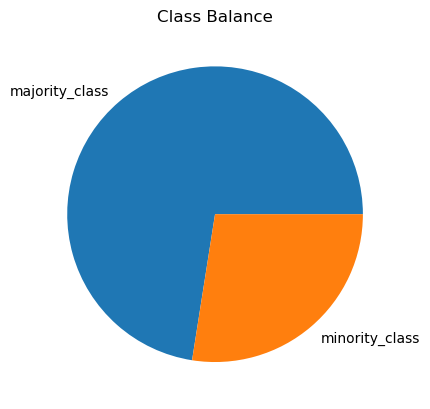

In [105]:
balance=[df2[df2["Loan_Balance"]==1].shape[0],df2[df2["Loan_Balance"]==0].shape[0]]
my_label=["majority_class","minority_class"]
plt.pie(balance,labels=my_label)
plt.title("Class Balance")
plt.show

/home/node-02/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


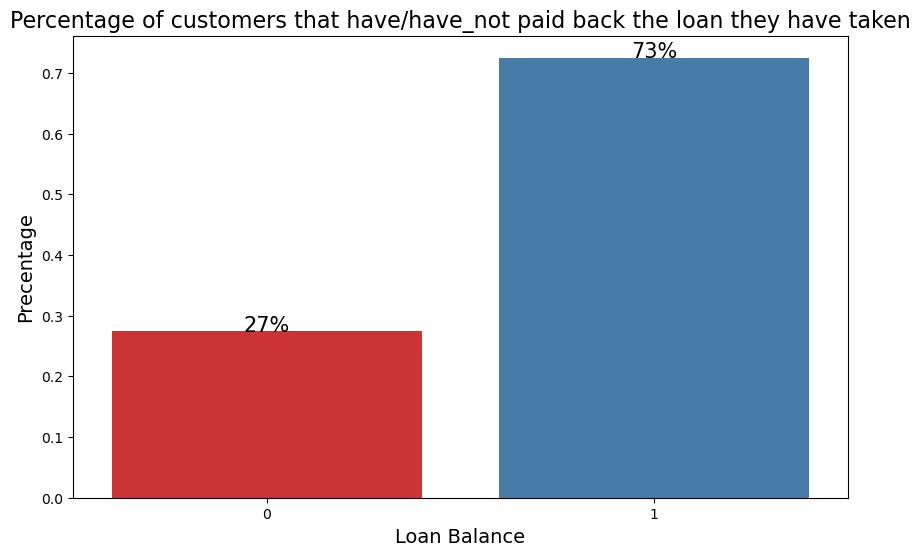

In [106]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(df2['Loan_Balance'], df2['Loan_Balance'], palette='Set1', estimator=lambda x: len(x) / len(df2) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Loan Balance', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Percentage of customers that have/have_not paid back the loan they have taken', fontsize=16)
plt.show()

# Feature Selection- With Correlation

In [107]:
X = df2.drop("Loan_Balance",axis=1)   #Feature Matrix
y = df2["Loan_Balance"] 

In [108]:
# import a library to split the data set
from sklearn.model_selection import train_test_split

# Splitting the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=422,stratify=y)
X_train.shape, X_test.shape

((934400, 29), (233600, 29))

In [109]:

X_train.corr()


,CUST_AGE,INIT_LOAN_AMT,INIT_LOAN_POUNDAGE,LATE_PAY_FEE,LOAN_POUNDAGE,REPAY_AMT,REPAY_POUNDAGE,RECHARGE_AMNT,OFF_PEAK_USG_MINUTE,OFF_PEAK_AMT_ETB,...,NET_BUSI_TYPE_NAME_WCDMA,GENDER_NAME_Male,EDUCATION_NAME_Diploma/Certificate,EDUCATION_NAME_Illiterate,EDUCATION_NAME_Master's Degree and Above,EDUCATION_NAME_Primary School,EDUCATION_NAME_Secondary school,OPER_TYPE_L,OPER_TYPE_R,OPER_TYPE_T
CUST_AGE,1.000000,0.009184,0.009500,0.004127,0.004778,0.008446,0.007383,0.006550,0.000066,-0.001601,...,0.027470,0.052893,-0.023397,0.100609,0.016298,-0.002910,-0.081724,0.003841,-0.001287,-0.002106
INIT_LOAN_AMT,0.009184,1.000000,0.992314,0.530245,0.734384,0.500884,0.439301,0.033004,0.003321,0.000274,...,-0.011234,-0.001883,-0.001197,0.013746,0.001520,-0.007227,-0.008382,-0.011086,0.088903,-0.099428
INIT_LOAN_POUNDAGE,0.009500,0.992314,1.000000,0.527268,0.739558,0.496501,0.444390,0.033173,0.003287,0.000612,...,-0.011512,-0.001821,-0.001007,0.014230,0.001554,-0.007583,-0.008686,-0.009730,0.084936,-0.095839
LATE_PAY_FEE,0.004127,0.530245,0.527268,1.000000,0.745680,-0.120046,-0.232668,0.017122,0.002183,-0.000664,...,-0.005324,-0.000317,-0.000830,0.004039,0.001080,-0.003219,-0.001755,0.475901,-0.333716,-0.051711
LOAN_POUNDAGE,0.004778,0.734384,0.739558,0.745680,1.000000,0.309607,-0.265536,0.027143,0.003340,-0.000825,...,-0.008172,-0.000526,-0.000922,0.005721,0.000706,-0.003483,-0.002571,0.155477,-0.066860,-0.069231
REPAY_AMT,0.008446,0.500884,0.496501,-0.120046,0.309607,1.000000,0.312547,0.023007,0.001699,0.000519,...,-0.006135,-0.001528,-0.001278,0.014566,0.000664,-0.005299,-0.009003,-0.325006,0.285271,-0.035825
REPAY_POUNDAGE,0.007383,0.439301,0.444390,-0.232668,-0.265536,0.312547,1.000000,0.011766,0.000453,0.002049,...,-0.005309,-0.001668,-0.000162,0.012795,0.001167,-0.006291,-0.008975,-0.219230,0.211876,-0.048264
RECHARGE_AMNT,0.006550,0.033004,0.033173,0.017122,0.027143,0.023007,0.011766,1.000000,0.000150,-0.000535,...,-0.011100,-0.004514,0.000819,0.009974,-0.000118,-0.007478,-0.005741,0.003934,-0.001675,-0.001940
OFF_PEAK_USG_MINUTE,0.000066,0.003321,0.003287,0.002183,0.003340,0.001699,0.000453,0.000150,1.000000,0.170389,...,0.000321,0.000021,0.001052,0.002025,-0.001053,-0.000075,-0.002881,-0.000347,0.000886,-0.000765
OFF_PEAK_AMT_ETB,-0.001601,0.000274,0.000612,-0.000664,-0.000825,0.000519,0.002049,-0.000535,0.170389,1.000000,...,-0.000138,-0.001025,0.001663,-0.000485,0.000969,-0.002460,0.001484,0.002448,-0.000956,-0.001258


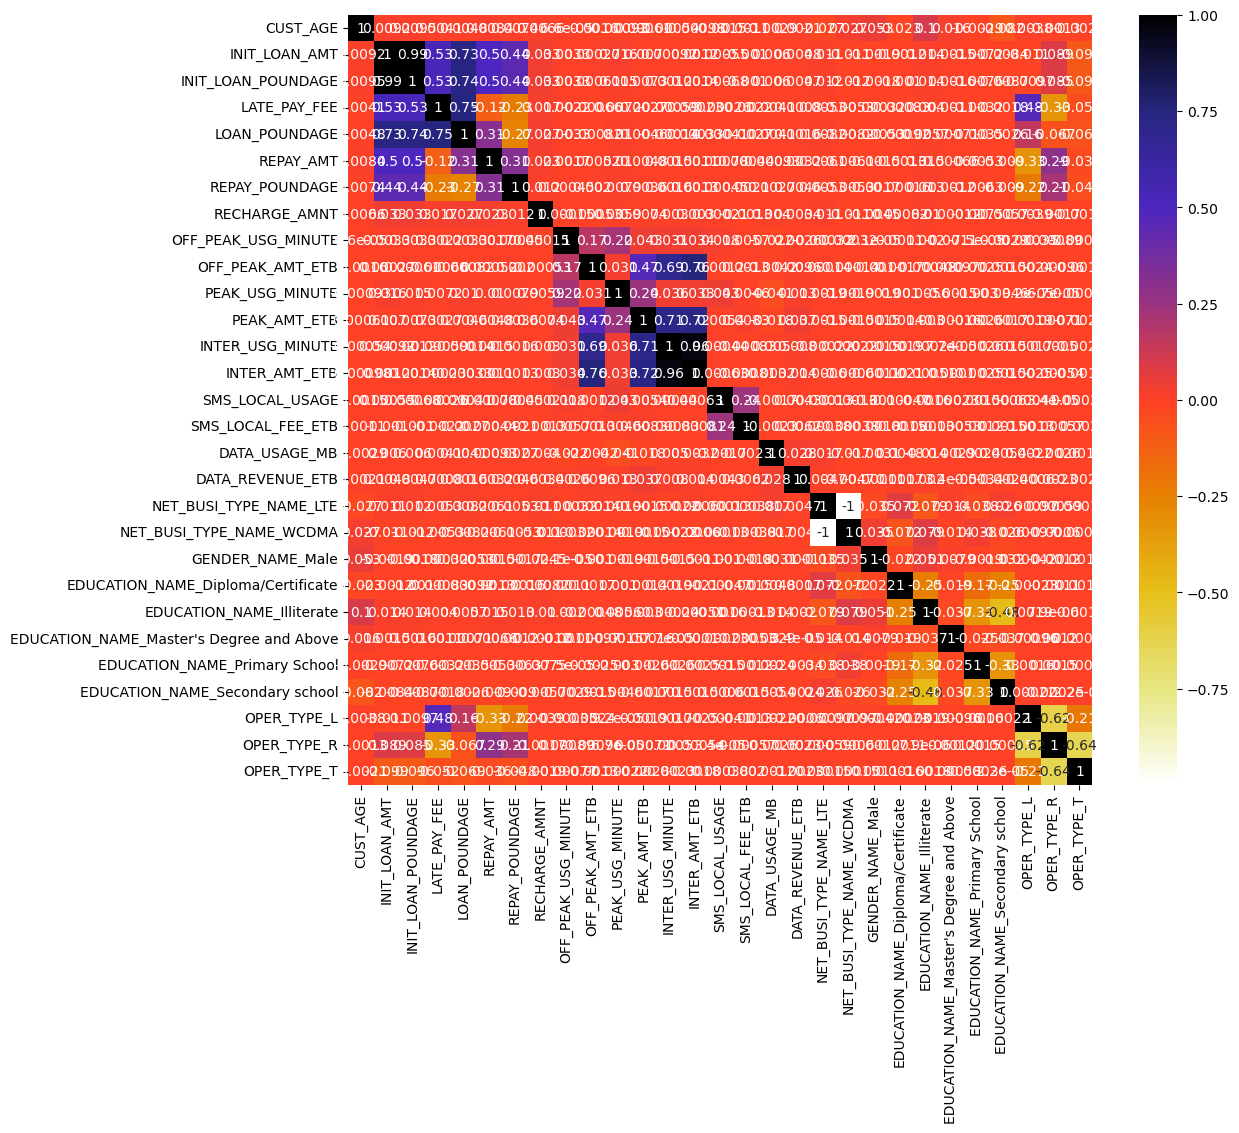

In [110]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [111]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [112]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [113]:
corr_features

{'INIT_LOAN_POUNDAGE', 'INTER_AMT_ETB', 'INTER_USG_MINUTE', 'LOAN_POUNDAGE'}

In [114]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [115]:
#X_train.to_csv("X_train.csv",index_label=False)
#X_test.to_csv("X_test.csv",index_label=False)
#y_train.to_csv("y_train.csv",index_label=False)
#y_test.to_csv("y_test.csv",index_label=False)

In [116]:
X_train.head()

,CUST_AGE,INIT_LOAN_AMT,LATE_PAY_FEE,REPAY_AMT,REPAY_POUNDAGE,RECHARGE_AMNT,OFF_PEAK_USG_MINUTE,OFF_PEAK_AMT_ETB,PEAK_USG_MINUTE,PEAK_AMT_ETB,...,NET_BUSI_TYPE_NAME_WCDMA,GENDER_NAME_Male,EDUCATION_NAME_Diploma/Certificate,EDUCATION_NAME_Illiterate,EDUCATION_NAME_Master's Degree and Above,EDUCATION_NAME_Primary School,EDUCATION_NAME_Secondary school,OPER_TYPE_L,OPER_TYPE_R,OPER_TYPE_T
5467760,42,25,0,10,2,25,73,0,78,0,...,0,1,0,1,0,0,0,0,1,0
30347028,20,5,4,1,0,5,0,0,29,0,...,0,0,0,0,0,1,0,0,0,1
14238667,44,5,5,0,0,45,739,0,86,0,...,1,1,0,0,0,0,1,1,0,0
14849715,34,15,4,10,0,60,0,0,268,2,...,0,1,0,1,0,0,0,0,1,0
30786791,60,10,0,0,1,20,0,0,464,0,...,0,0,0,0,0,1,0,0,1,0


In [117]:
#x=df2.drop('Loan_Balance',axis=1)
#y=df2['Loan_Balance']

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rc=RandomForestClassifier()
rc=rc.fit(X_train,y_train)

In [120]:
p=rc.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("The accuracy is ", accuracy_score(y_test,p))
print("classification result")
print(classification_report(y_test, p))
print("confussin matrix result")
print(confusion_matrix(y_test, p))

The accuracy is  0.9999357876712329
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result
[[ 64205      0]
 [    15 169380]]


/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


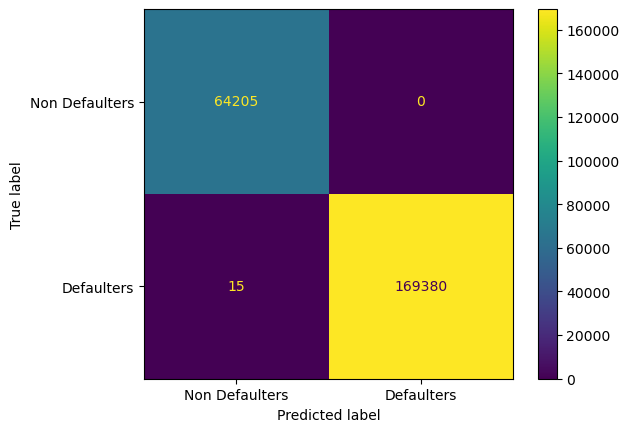

In [122]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rc,X_test, y_test,display_labels=['Non Defaulters','Defaulters'])
#save.fig('con')
plt.show()

# Now save the model

In [151]:
import pickle
with open("RandomForestClassifier_unbalanced","wb") as f:
    pickle.dump(rc,f)

# undesampling for random forest

In [123]:
from collections import Counter
Counter(y_train)

Counter({1: 677581, 0: 256819})

In [124]:
from imblearn.under_sampling import RandomUnderSampler  

In [125]:
#from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 677581, 0: 256819})
The number of classes after fit Counter({0: 256819, 1: 256819})


In [126]:
X_train_ns.to_csv("X_train_under.csv",index_label=False)
y_train_ns.to_csv("y_train_under.csv",index_label=False)

# Model

In [127]:
rfc=RandomForestClassifier()
rfc=rfc.fit(X_train_ns,y_train_ns)
rfp=rfc.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,rfp))
print("classification result")
print(classification_report(y_test, rfp))
print("confussin matrix result")
print(confusion_matrix(y_test, rfp))

The accuracy is  0.9908090753424658
classification result
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     64205
           1       1.00      0.99      0.99    169395

    accuracy                           0.99    233600
   macro avg       0.98      0.99      0.99    233600
weighted avg       0.99      0.99      0.99    233600

confussin matrix result
[[ 64205      0]
 [  2147 167248]]


# Save the model

In [154]:
import pickle
with open("RandomForestClassifier_under_sampling","wb") as f:
    pickle.dump(rfc,f)

# oversampling

In [128]:
from imblearn.over_sampling import RandomOverSampler

In [129]:
os=RandomOverSampler()
X_train_over,y_train_over=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_over)))

The number of classes before fit Counter({1: 677581, 0: 256819})
The number of classes after fit Counter({1: 677581, 0: 677581})


In [130]:
rfc_over=RandomForestClassifier()
rfc_over=rfc_over.fit(X_train_over,y_train_over)
rfp_over=rfc_over.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,rfp_over))
print("classification result")
print(classification_report(y_test, rfp_over))
print("confussin matrix result")
print(confusion_matrix(y_test, rfp_over))

The accuracy is  0.9999272260273973
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result
[[ 64205      0]
 [    17 169378]]


# Save the model

In [155]:
import pickle
with open("RandomForestClassifier_over_sampling","wb") as f:
    pickle.dump(rfc_over,f)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)
pr= dt.predict(X_test)


In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("THe accuracy is ", accuracy_score(y_test,pr))
print("classification result")
print(classification_report(y_test, pr))
print("confussin matrix result")
print(confusion_matrix(y_test, pr))

THe accuracy is  1.0
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result
[[ 64205      0]
 [     0 169395]]


# Decission tree After Under balancing 

In [82]:
dtr=DecisionTreeClassifier()
dtr=dt.fit(X_train_ns,y_train_ns)
dt_predict= dtr.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,dt_predict))
print("classification result")
print(classification_report(y_test, dt_predict))
print("confussin matrix result")
#print(confusion_matrix(y_test, dt_predict)

The accuracy is  0.9970291095890411
classification result
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       0.99      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result


# Decission tree After oversampling

In [83]:
dtr_over=DecisionTreeClassifier()
dtr_over=dtr_over.fit(X_train_over,y_train_over)
dt_predict_over= dtr_over.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,dt_predict_over))
print("classification result")
print(classification_report(y_test, dt_predict_over))
print("confussin matrix result")
#print(confusion_matrix(y_test, dt_predict)

The accuracy is  1.0
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result


# Logistic Regression:unbalanced

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logr = LogisticRegression()
logr= logr.fit(X_train,y_train)

/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
pl=logr.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("THe accuracy is ", accuracy_score(y_test,pl))
print("classification result")
print(classification_report(y_test, pl))
print("confussin matrix result")
print(confusion_matrix(y_test, pl))

THe accuracy is  0.939486301369863
classification result
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     64205
           1       0.96      0.95      0.96    169395

    accuracy                           0.94    233600
   macro avg       0.92      0.93      0.92    233600
weighted avg       0.94      0.94      0.94    233600

confussin matrix result
[[ 58290   5915]
 [  8221 161174]]


/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


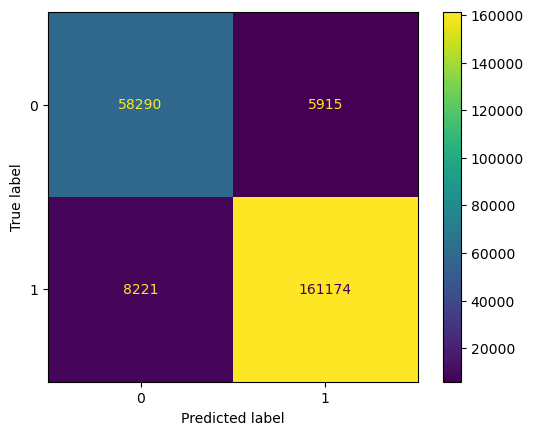

In [135]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logr,X_test, y_test)
#save.fig('con')
plt.show()

# Save the model

In [167]:
import pickle
with open("Logistic_unbalanced","wb") as f:
    pickle.dump(logr,f)

# Logistic Regression For balanced:Undersampling

In [136]:
lr_under = LogisticRegression()
lr_under= lr_under.fit(X_train_ns,y_train_ns)
lr_predict_under=lr_under.predict(X_test)



print("The accuracy is ", accuracy_score(y_test,lr_predict_under))
print("classification result")
print(classification_report(y_test, lr_predict_under))
print("confussin matrix result")
print(confusion_matrix(y_test, lr_predict_under))


/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy is  0.9827953767123287
classification result
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     64205
           1       1.00      0.98      0.99    169395

    accuracy                           0.98    233600
   macro avg       0.97      0.99      0.98    233600
weighted avg       0.98      0.98      0.98    233600

confussin matrix result
[[ 64201      4]
 [  4015 165380]]


# Save the model

In [157]:
import pickle
with open("Logistics_under_sampling","wb") as f:
    pickle.dump(lr_under,f)

# Logistic regression balanced:oversampling

In [137]:
lr_over = LogisticRegression()
lr_over= lr_under.fit(X_train_over,y_train_over)
lr_predict_over=lr_under.predict(X_test)



print("The accuracy is ", accuracy_score(y_test,lr_predict_over))
print("classification result")
print(classification_report(y_test, lr_predict_over))
print("confussin matrix result")
print(confusion_matrix(y_test, lr_predict_over))


/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy is  0.9942380136986302
classification result
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     64205
           1       1.00      0.99      1.00    169395

    accuracy                           0.99    233600
   macro avg       0.99      1.00      0.99    233600
weighted avg       0.99      0.99      0.99    233600

confussin matrix result
[[ 64184     21]
 [  1325 168070]]


# Save the model

In [158]:
import pickle
with open("Logistics_over_sampling","wb") as f:
    pickle.dump(lr_over,f)

# xgboost:unbalanced

In [91]:
import xgboost as xgb

In [92]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier= xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,predictions))
print("classification result")
print(classification_report(y_test, predictions))
print("confussin matrix result")
print(confusion_matrix(y_test, predictions))

The accuracy is  1.0
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result
[[ 64205      0]
 [     0 169395]]


# xgboost balanced:undersampling

In [93]:
xgb_classifier_under = xgb.XGBClassifier()
xgb_classifier_under= xgb_classifier.fit(X_train_ns,y_train_ns)
xgb_predictions_under = xgb_classifier.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,xgb_predictions_under))
print("classification result")
print(classification_report(y_test, xgb_predictions_under))
print("confussin matrix result")
print(confusion_matrix(y_test, xgb_predictions_under))

The accuracy is  0.9990282534246575
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result
[[ 64205      0]
 [   227 169168]]


# xgboos: Balanced: oversampling

In [94]:
xgb_cl_over = xgb.XGBClassifier()
xgb_cl_over= xgb_cl_over.fit(X_train_over,y_train_over)
xg_predict_over  = xgb_cl_over.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,xg_predict_over))
print("classification result")
print(classification_report(y_test, xg_predict_over))
print("confussin matrix result")
print(confusion_matrix(y_test, xg_predict_over))

The accuracy is  1.0
classification result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64205
           1       1.00      1.00      1.00    169395

    accuracy                           1.00    233600
   macro avg       1.00      1.00      1.00    233600
weighted avg       1.00      1.00      1.00    233600

confussin matrix result
[[ 64205      0]
 [     0 169395]]


# Naive Bayes 

# GaussianNB:unbalanced

In [138]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [139]:
p22=gnb.predict(X_test)

In [140]:

print("THe accuracy is ", accuracy_score(y_test,p22))
print("classification result")
print(classification_report(y_test, p22))
print("confussin matrix result")
print(confusion_matrix(y_test, p22))

THe accuracy is  0.8266823630136987
classification result
              precision    recall  f1-score   support

           0       0.77      0.53      0.63     64205
           1       0.84      0.94      0.89    169395

    accuracy                           0.83    233600
   macro avg       0.80      0.73      0.76    233600
weighted avg       0.82      0.83      0.82    233600

confussin matrix result
[[ 34066  30139]
 [ 10348 159047]]


# Ploting The Confusion-Matrix

/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


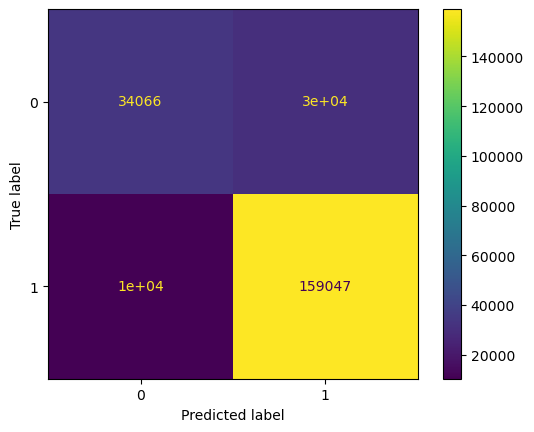

In [141]:
plot_confusion_matrix(gnb ,X_test, y_test )
#save.fig('con')
plt.show()

# Save the model

In [159]:
import pickle
with open("Naive_unbalanced","wb") as f:
    pickle.dump(gnb,f)

# Naive Bayes for balanced: undersampling

In [142]:
# instantiate the model
gn_under = GaussianNB()


# fit the model
gn_under.fit(X_train_ns,y_train_ns)

gn_predict_under = gn_under.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,gn_predict_under))
print("classification result")
print(classification_report(y_test, gn_predict_under))
print("confussin matrix result")
print(confusion_matrix(y_test, gn_predict_under))

The accuracy is  0.6822902397260274
classification result
              precision    recall  f1-score   support

           0       0.39      0.27      0.31     64205
           1       0.75      0.84      0.79    169395

    accuracy                           0.68    233600
   macro avg       0.57      0.55      0.55    233600
weighted avg       0.65      0.68      0.66    233600

confussin matrix result
[[ 17018  47187]
 [ 27030 142365]]


# Save the model

In [160]:
import pickle
with open("Naive_under_sampling","wb") as f:
    pickle.dump(gn_under,f)

# Naive bayes:Balanced: Over sampling

In [143]:
# instantiate the model
gn_over = GaussianNB()


# fit the model
gn_over.fit(X_train_over,y_train_over)

gn_predict_over = gn_over.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,gn_predict_over))
print("classification result")
print(classification_report(y_test, gn_predict_over))
print("confussin matrix result")
print(confusion_matrix(y_test, gn_predict_over))

The accuracy is  0.6927739726027398
classification result
              precision    recall  f1-score   support

           0       0.47      1.00      0.64     64205
           1       1.00      0.58      0.73    169395

    accuracy                           0.69    233600
   macro avg       0.74      0.79      0.69    233600
weighted avg       0.85      0.69      0.71    233600

confussin matrix result
[[64205     0]
 [71768 97627]]


# Save the model

In [161]:
import pickle
with open("Naive_over_sampling","wb") as f:
    pickle.dump(gn_over,f)

# K Nearest Neighbor

In [144]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
y_pred = classifier.predict(X_test)

/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [146]:

print("The accuracy is ", accuracy_score(y_test,y_pred ))
print("classification result")
print(classification_report(y_test, y_pred ))
print("confussin matrix result")
print(confusion_matrix(y_test,y_pred ))

The accuracy is  0.9034417808219178
classification result
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     64205
           1       0.93      0.93      0.93    169395

    accuracy                           0.90    233600
   macro avg       0.88      0.88      0.88    233600
weighted avg       0.90      0.90      0.90    233600

confussin matrix result
[[ 52908  11297]
 [ 11259 158136]]


# Save the model

In [162]:
import pickle
with open("KNN_unbalanced","wb") as f:
    pickle.dump(classifier,f)

# K nearest for balanced : undersampling

In [147]:
# instantiate the model
classifier_under = KNeighborsClassifier(n_neighbors = 3)
classifier_under=classifier_under.fit(X_train_ns, y_train_ns)

classifier_predict_under = classifier_under.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,classifier_predict_under))
print("classification result")
print(classification_report(y_test, classifier_predict_under))
print("confussin matrix result")
print(confusion_matrix(y_test, classifier_predict_under))

/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy is  0.7316909246575343
classification result
              precision    recall  f1-score   support

           0       0.51      0.95      0.66     64205
           1       0.97      0.65      0.78    169395

    accuracy                           0.73    233600
   macro avg       0.74      0.80      0.72    233600
weighted avg       0.84      0.73      0.75    233600

confussin matrix result
[[ 60775   3430]
 [ 59247 110148]]


# Save the model

In [163]:
import pickle
with open("KNN_under_sampling","wb") as f:
    pickle.dump(classifier_under,f)

# K nearest for balanced data: Oversampling

In [148]:
# instantiate the model
classifier_over = KNeighborsClassifier(n_neighbors = 3)
classifier_over=classifier_under.fit(X_train_over, y_train_over)

classifier_predict_over = classifier_under.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,classifier_predict_over))
print("classification result")
print(classification_report(y_test, classifier_predict_over))
print("confussin matrix result")
print(confusion_matrix(y_test, classifier_predict_over))

/home/node-02/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy is  0.8991095890410958
classification result
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     64205
           1       0.96      0.90      0.93    169395

    accuracy                           0.90    233600
   macro avg       0.86      0.90      0.88    233600
weighted avg       0.91      0.90      0.90    233600

confussin matrix result
[[ 58320   5885]
 [ 17683 151712]]


# Save the model

In [164]:
import pickle
with open("KNN_over_sampling","wb") as f:
    pickle.dump(classifier_over,f)

# Svm

In [ ]:

from sklearn import svm


# Creating an SVM classifier object
svm_clf = svm.SVC(kernel='linear', C=1)

# Training the SVM classifier on the training set
svm_clf=svm_clf.fit(X_train, y_train)

# Predicting the classes of the test set
svm_pred_unbalanced = svm_clf(X_test)

# Evaluating the performance of the classifier
print("The accuracy is ", accuracy_score(y_test,svm_pred_unbalanced))
print("classification result")
print(classification_report(y_test, svm_pred_unbalanced))
print("confussin matrix result")
print(confusion_matrix(y_test, svm_pred_unbalanced))

# SVM:bALANCED:uNDERSAMPLING

In [ ]:
# instantiate the model
SVM_classifier_under = KNeighborsClassifier(n_neighbors = 3)
SVM_classifier_under=SVM_classifier_under.fit(X_train_ns, y_train_ns)

SVM_classifier_predict_under = SVM_classifier_under.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,SVM_classifier_predict_under))
print("classification result")
print(classification_report(y_test, SVM_classifier_predict_under))
print("confussin matrix result")
print(confusion_matrix(y_test, SVM_classifier_predict_under))

# SVM:oversampling

In [ ]:
# instantiate the model
SVM_classifier_over = KNeighborsClassifier(n_neighbors = 3)
SVM_classifier_over=classifier_under.fit(X_train_over, y_train_over)

SVM_classifier_predict_over = SVM_classifier_over.predict(X_test)
print("The accuracy is ", accuracy_score(y_test,SVM_classifier_predict_over))
print("classification result")
print(classification_report(y_test, SVM_classifier_predict_over))
print("confussin matrix result")
print(confusion_matrix(y_test, SVM_classifier_predict_over))